In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist, pdist, squareform

# **Propriété**

Pour deux ensembles de points A et B dans un espace métrique, le diamètre de leur union satisfait l'inégalité suivante :
$$\delta(A \cup B) \leq \delta(A) + d(A, B) + \delta(B)$$
où :
- $\delta(X)$ est le diamètre de l'ensemble X, défini comme la distance maximale entre deux points quelconques de X.
- $d(A, B)$ est la distance minimale entre les ensembles A et B, définie comme la distance minimale entre un point de A et un point de B.
Ce code génère deux ensembles de points aléatoires A et B, calcule leurs diamètres respectifs, la distance minimale entre eux, et le diamètre de leur union. Il visualise ensuite ces ensembles et les distances pertinentes pour illustrer la propriété.

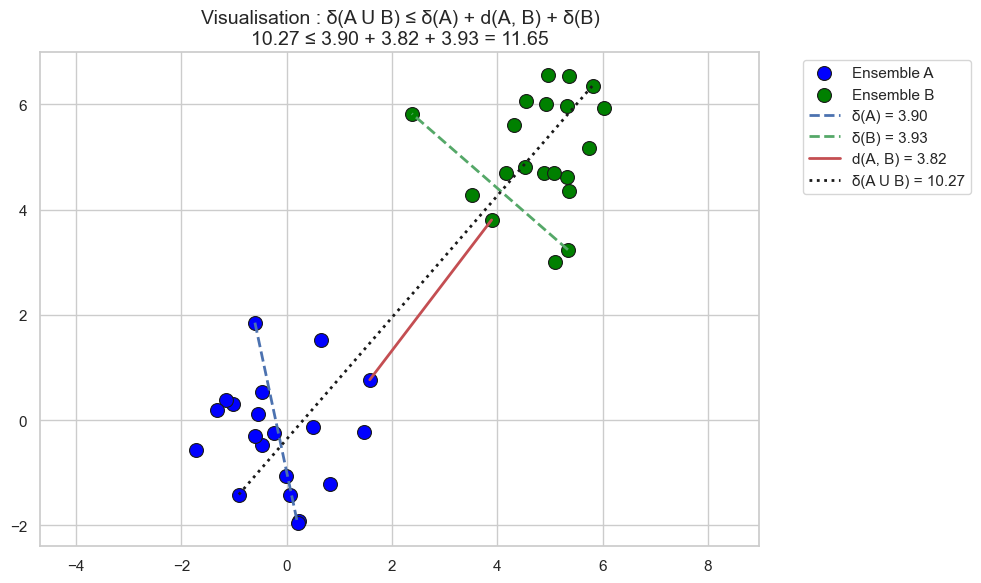

In [3]:
# 1. Configuration et Génération des Données
sns.set_theme(style="whitegrid")
np.random.seed(42) # Pour avoir toujours le même résultat

# Générer deux nuages de points (Ensembles A et B)
# A est centré en (0,0), B est centré en (5,2)
A = np.random.normal(loc=0, scale=1, size=(20, 2))
B = np.random.normal(loc=5, scale=1, size=(20, 2))

# Créer l'union pour le calcul global
U = np.vstack((A, B))

# 2. Fonctions de Calcul Géométrique

def get_diameter_pair(points):
    """
    Trouve les deux points les plus éloignés dans un ensemble (le diamètre).
    Utilise pdist pour calculer toutes les distances possibles entre les points.
    """
    if len(points) < 2:
        return points[0], points[0], 0
    # Calculer toutes les distances par paires
    dists = squareform(pdist(points))
    # Trouver l'index de la distance maximale
    i, j = np.unravel_index(np.argmax(dists), dists.shape)
    return points[i], points[j], dists[i, j]

def get_min_dist_pair(set1, set2):
    """
    Trouve la paire de points (un dans set1, un dans set2) qui sont les plus proches.
    C'est la distance d(A, B).
    """
    # Calculer la matrice de distance entre set1 et set2
    dists = cdist(set1, set2)
    # Trouver l'index de la distance minimale
    i, j = np.unravel_index(np.argmin(dists), dists.shape)
    return set1[i], set2[j], dists[i, j]

# 3. Exécution des Calculs
# Diamètre de A
pA1, pA2, diam_A = get_diameter_pair(A)
# Diamètre de B
pB1, pB2, diam_B = get_diameter_pair(B)
# Distance entre A et B (le "pont")
p_min_A, p_min_B, dist_AB = get_min_dist_pair(A, B)
# Diamètre de l'Union (la distance maximale totale)
pU1, pU2, diam_U = get_diameter_pair(U)

# 4. Tracé du Graphique
plt.figure(figsize=(10, 6))

# Dessiner les points
sns.scatterplot(x=A[:, 0], y=A[:, 1], color="blue", label="Ensemble A", s=100, edgecolor="k")
sns.scatterplot(x=B[:, 0], y=B[:, 1], color="green", label="Ensemble B", s=100, edgecolor="k")

# Dessiner les lignes représentatives
# Diamètre A (Ligne bleue pointillée)
plt.plot([pA1[0], pA2[0]], [pA1[1], pA2[1]], 'b--', linewidth=2, label=f'δ(A) = {diam_A:.2f}')

# Diamètre B (Ligne verte pointillée)
plt.plot([pB1[0], pB2[0]], [pB1[1], pB2[1]], 'g--', linewidth=2, label=f'δ(B) = {diam_B:.2f}')

# Distance d(A, B) (Ligne rouge pleine)
plt.plot([p_min_A[0], p_min_B[0]], [p_min_A[1], p_min_B[1]], 'r-', linewidth=2, label=f'd(A, B) = {dist_AB:.2f}')

# Diamètre de l'Union (Ligne noire pointillés fins)
plt.plot([pU1[0], pU2[0]], [pU1[1], pU2[1]], 'k:', linewidth=2, label=f'δ(A U B) = {diam_U:.2f}')

# Titre et Légende
rhs = diam_A + dist_AB + diam_B # Le membre de droite de l'inégalité
plt.title(f"Visualisation : δ(A U B) ≤ δ(A) + d(A, B) + δ(B)\n{diam_U:.2f} ≤ {diam_A:.2f} + {dist_AB:.2f} + {diam_B:.2f} = {rhs:.2f}", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustements finaux
plt.axis('equal') # Pour ne pas déformer les distances visuelles
plt.tight_layout()
plt.show()

In [ ]:
print('end')

**Proposition**

Soit $(E, d)$ un espace métrique, $A$ un sous-ensemble borné non vide de $E$, et $x_0 \in E$. Alors :

$$ A \subseteq B_f(x_0, d(x_0, A) + \delta(A)) $$

**Démonstration :**

Soit $y$ un point quelconque de $A$.
D'après l'inégalité triangulaire, pour tout point $a \in A$, on a :
$$ d(x_0, y) \leq d(x_0, a) + d(a, y) $$

Or, par définition du diamètre $\delta(A) = \sup_{u,v \in A} d(u, v)$, on sait que $d(a, y) \leq \delta(A)$. Ainsi :
$$ d(x_0, y) \leq d(x_0, a) + \delta(A) $$

Puisque cette inégalité est vraie pour tout $a \in A$, elle reste vraie en prenant l'infimum sur $a$ (le membre de gauche ne dépendant pas de $a$) :
$$ d(x_0, y) \leq \inf_{a \in A} d(x_0, a) + \delta(A) $$

Par définition de la distance d'un point à un ensemble, $d(x_0, A) = \inf_{a \in A} d(x_0, a)$. On obtient donc :
$$ d(x_0, y) \leq d(x_0, A) + \delta(A) $$

Par conséquent, tout point $y$ de $A$ appartient à la boule fermée de centre $x_0$ et de rayon $R = d(x_0, A) + \delta(A)$.

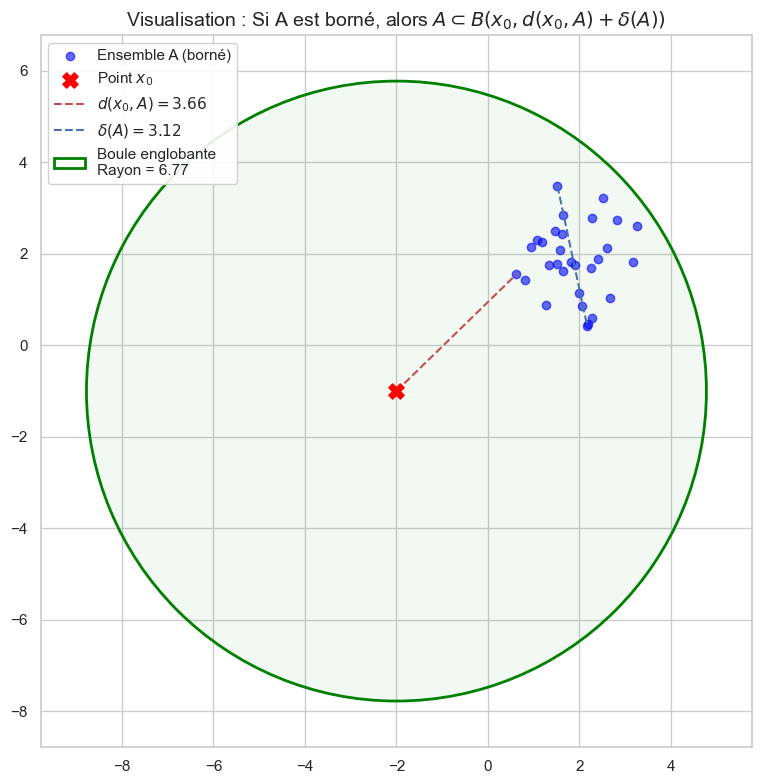

In [4]:
# Configuration du style
sns.set_theme(style="whitegrid")
np.random.seed(42)

# 1. Création des données
# Générer l'ensemble A (nuage de points borné)
# Centré en (2, 2) avec une certaine dispersion
A = np.random.normal(loc=2, scale=0.8, size=(30, 2))

# Définir un point x0 arbitraire (hors de l'ensemble A)
x0 = np.array([-2, -1])

# 2. Calculs géométriques

# Calcul de d(x0, A) : la distance minimale entre x0 et les points de A
dists_x0_A = cdist([x0], A)[0] # Distances de x0 à tous les points de A
idx_closest = np.argmin(dists_x0_A)
p_closest = A[idx_closest]
d_x0_A = dists_x0_A[idx_closest]

# Calcul du diamètre δ(A) : la distance maximale entre deux points de A
dists_A = squareform(pdist(A)) # Toutes les distances par paires dans A
# Trouver les indices des deux points les plus éloignés
i, j = np.unravel_index(np.argmax(dists_A), dists_A.shape)
p_diam1, p_diam2 = A[i], A[j]
delta_A = dists_A[i, j]

# Calcul du Rayon de la boule englobante
# R = distance pour atteindre A + taille maximale de A
radius = d_x0_A + delta_A

# 3. Création du Graphique
fig, ax = plt.subplots(figsize=(10, 8))

# Tracer les points de l'ensemble A
ax.scatter(A[:, 0], A[:, 1], c='blue', alpha=0.6, label='Ensemble A (borné)')

# Tracer le point x0
ax.scatter(x0[0], x0[1], c='red', s=120, marker='X', label='Point $x_0$', zorder=5)

# Visualiser la distance d(x0, A)
ax.plot([x0[0], p_closest[0]], [x0[1], p_closest[1]], 'r--', linewidth=1.5,
        label=f'$d(x_0, A) = {d_x0_A:.2f}$')

# Visualiser le diamètre δ(A)
ax.plot([p_diam1[0], p_diam2[0]], [p_diam1[1], p_diam2[1]], 'b--', linewidth=1.5,
        label=f'$\delta(A) = {delta_A:.2f}$')

# Tracer la Boule B(x0, R) qui englobe tout
# Cercle vert
circle = plt.Circle(x0, radius, color='green', fill=False, linewidth=2, linestyle='-',
                    label=f'Boule englobante\nRayon = {radius:.2f}')
ax.add_patch(circle)
# Remplissage léger pour visualiser l'intérieur
circle_fill = plt.Circle(x0, radius, color='green', alpha=0.05)
ax.add_patch(circle_fill)

# Mise en forme du graphique
ax.set_aspect('equal')
ax.set_title(f"Visualisation : Si A est borné, alors $A \subset B(x_0, d(x_0, A) + \delta(A))$", fontsize=14)
ax.legend(loc='upper left', framealpha=0.9)

# Ajuster les limites des axes pour bien voir le cercle entier
buffer = 1
plt.xlim(x0[0] - radius - buffer, max(np.max(A[:,0]), x0[0] + radius) + buffer)
plt.ylim(x0[1] - radius - buffer, max(np.max(A[:,1]), x0[1] + radius) + buffer)

plt.tight_layout()
plt.show()